<h1><center>Wojciech Sałapatek grupa 2</h1></center>

***Zad1***

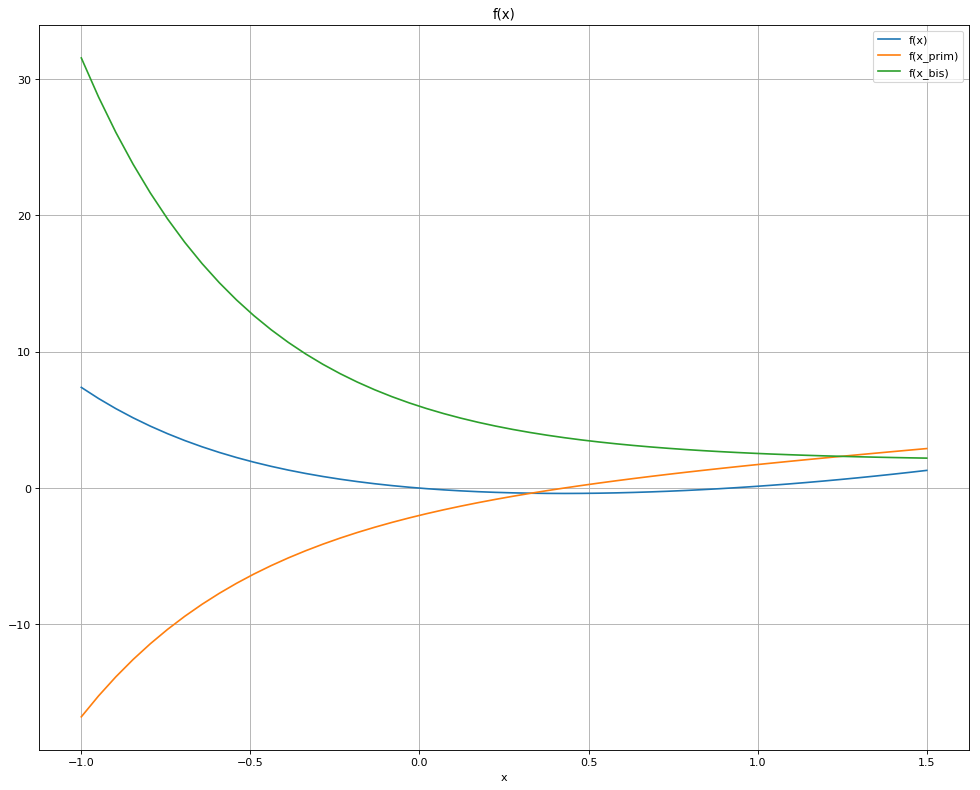

Oszacowane przedziały to [0.5, 1.5], [-0.5, 0.5]


In [56]:
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy.optimize as sp

f = lambda x: math.e**(-2*x) + x**2 - 1
f_prim = lambda x: -2*math.e**(-2*x) + 2*x
f_bis = lambda x: 4*math.e**(-2*x) + 2

x = np.linspace(-1, 1.5)
y = [f(i) for i in x]
y_p = [f_prim(i) for i in x]
y_b = [f_bis(i) for i in x]


fig = plt.figure(num=None, figsize=(15, 12), dpi=80, facecolor='w', edgecolor='k')
plot = fig.add_subplot(111)
plt.title("f(x)")
plot.plot(x, y, label="f(x)")
plot.plot(x, y_p, label="f(x_prim)")
plot.plot(x, y_b, label="f(x_bis)")
plot.legend()
plt.xlabel("x")
plot.grid(True)
plt.show()


print("Oszacowane przedziały to [{}, {}], [{}, {}]".format(0.5, 1.5, -0.5, 0.5))

***Zad2***


<h6>Warunki wystarczające zbieżności metody w przedziale izolacji pierwiastka [a,b]: </h6>  
* $f(a)*f(b) < 0$

Implementacja funkcji daje wynik zgodny co do dziewiątego miejsca po przecinku z wynikiem funkcji z pakietu SciPy.
Czas wykonania funkcji biscet z pakietu SciPy jest nieznacznie szybszy.

In [57]:
import time
def timing(f):
    def wrap(*args,**kwargs):
        time1 = time.clock()
        ret = f(*args, **kwargs)
        time2 = time.clock()
        print ('{} ms'.format((time2-time1)*1000))
        return ret
    return wrap

def bisection(function, start, end, epsilon, max_iterations):
    a = start
    b = end
    iterations = 0;
    while abs(a-b) > epsilon:
        iterations += 1
        new_start = (a+b)/2
        if f(a)*f(new_start) < 0:
            b = new_start
        else:
            a = new_start
    return (a+b)/2, iterations


print("Wynik funkcji dla przedziału [0.5, 1.5]: {}".format(bisection(f, 0.5, 1.5, 10**(-10), 20000)))
print("Wynik scipy bisect dla przedziału [0.5, 1.5]: {}".format(sp.bisect(f, 0.5, 1.5, xtol=10**(-10))))

timed_scipy_bisection = timing(sp.bisect)
timed_bisection = timing(bisection)

print()
print("Moja funkcja:",end=" ")
timed_bisection(f, 0.5, 1.5, 10**(-10), 20000)
print("SciPy:", end=" ")
timed_scipy_bisection(f, 0.5, 1.5, xtol=10**(-10))

        
        

Wynik funkcji dla przedziału [0.5, 1.5]: (0.9165625830937643, 34)
Wynik scipy bisect dla przedziału [0.5, 1.5]: 0.9165625831228681

Moja funkcja: 0.04227153795000049 ms
SciPy: 0.022518483092426322 ms


0.9165625831228681

***Zad3***

<h6>Warunki wystarczające zbieżności metody dla ustalonego punktu startowego p: </h6>  
* W przedziale $[a,b]$, $f(x)$ jest klasy $C^{2} $ 
* w przedziale $[a,b]$ pierwsza i druga pochodna $f(x)$ mają stały znak
* $f(a)*f(b) < 0$
* $f(p)*f''(p) > 0$ gdzie $p = a \lor p = b$


Implementacja funkcji daje wynik identyczny co funkcja newton z pakietu SciPy.
Czas wykonania funkcji newton z pakietu SciPy jest nieznacznie wolniejszy.

In [58]:
def newton(fc, f_p, f_b, point, epsilon, max_iterations, iterations=0):
    new_point = point - fc(point)/f_p(point)
    if abs(point-new_point) < epsilon:
        return new_point, iterations + 1
    else:
        return newton(fc, f_p, f_b, new_point, epsilon, max_iterations, iterations+1)
    
print("f(1.5)*f''(1.5) = {} > 0 -> zatem start = 1.5".format(f_bis(1.5)*f(1.5)))
start = 1.5

print()
print("Wynik funkcji dla przedziału [0.5, 1.5], z punktem startowym {}: {}".format(start, newton(f, f_prim, f_bis, start, 10**(-10), 1000)))
print("Wynik scipy newton dla przedziału [0.5, 1.5], z punktem startowym {}: {}".format(start, sp.newton(f, start, fprime=f_prim, tol=10**(-10), maxiter=1000, fprime2=f_bis)))

timed_newton = timing(newton)
timed_scipy_newton = timing(sp.newton)

print()
print("Moja funkcja:",end=" ")
timed_newton(f, f_prim, f_bis, start, 10**(-10), 1000)
print("SciPy:", end=" ")
timed_scipy_newton(f, start, fprime=f_prim, tol=10**(-10), maxiter=1000, fprime2=f_bis)

    
    

f(1.5)*f''(1.5) = 2.8584244872817135 > 0 -> zatem start = 1.5

Wynik funkcji dla przedziału [0.5, 1.5], z punktem startowym 1.5: (0.9165625831056982, 6)
Wynik scipy newton dla przedziału [0.5, 1.5], z punktem startowym 1.5: 0.9165625831056982

Moja funkcja: 0.010271588962496025 ms
SciPy: 0.038715988466719864 ms


0.91656258310569816

***Zad4***

<h6>Warunki wystarczające zbieżności metody dla ustalonych punktów startowych   $ p_{0}, p_{1 }$ : </h6>  
* W przedziale $[a,b]$, $f(x)$ jest klasy $C^{2} $ 
* w przedziale $[a,b]$ pierwsza i druga pochodna $f(x)$ mają stały znak
* $f(a)*f(b) < 0$
* $f(p_{1})*f''(p_{1}) > 0$


Implementacja funkcji daje wynik identyczny co funkcja newton z pakietu SciPy.
Czas wykonania funkcji newton z pakietu SciPy jest nieznacznie wolniejszy.

In [59]:
def secant(fc, point, previous_point, epsilon, max_iterations, iterations=0):
    iterations += 1
    new_point = point - (f(point)/(f(previous_point) - f(point)))*(previous_point - point)
    if abs(new_point - point) < epsilon:
        return new_point, iterations
    else:
        return secant(fc, new_point, point, epsilon, max_iterations, iterations)
  
print("f(1.5)*f''(1.5) = {} > 0 -> zatem x0 = 1.5, x1=0.5".format(f_bis(1.5)*f(1.5)))
start = 1.5

print()
print("Wynik funkcji secant dla przedziału [0.5, 1.5], z punktem startowym {}: {}".format(start, secant(f, 0.5, start, 10**(-10), 1000)))
print("Wynik scipy newton dla przedziału [0.5, 1.5], z punktem startowym {}: {}".format(start, sp.newton(f, start, fprime=f_prim, tol=10**(-10), maxiter=1000, fprime2=f_bis)))

timed_secant = timing(secant)
timed_scipy_newton = timing(sp.newton)

print()
print("Moja funkcja:",end=" ")
timed_secant(f, 0.5, start, 10**(-10), 1000)
print("SciPy:", end=" ")
timed_scipy_newton(f, start, fprime=f_prim, tol=10**(-10), maxiter=1000, fprime2=f_bis)     
    

f(1.5)*f''(1.5) = 2.8584244872817135 > 0 -> zatem x0 = 1.5, x1=0.5

Wynik funkcji secant dla przedziału [0.5, 1.5], z punktem startowym 1.5: (0.9165625831056982, 8)
Wynik scipy newton dla przedziału [0.5, 1.5], z punktem startowym 1.5: 0.9165625831056982

Moja funkcja: 0.018172810996475164 ms
SciPy: 0.0410863549404894 ms


0.91656258310569816

<h6>Porównanie metod</h6>

Średni czas szukania pierwiastka metdą bisekcji jest znacząco większy od poszukiwania pozostałymi metodami. 
Jest to spowodomane liniową zbieżnością metody. Najszybsza jest metoda stycznych - charakteryzująca się zbieżnością kwadratową. 
Niewiele wolniejsza od niej jest metoda siecznych - zbieżność ponadliniowa. Pomiar czasów wykonania jest zgodny z przewidywaniami.

In [83]:
def timer(f):
    def wrap(*args,**kwargs):
        time1 = time.clock()
        ret = f(*args, **kwargs)
        time2 = time.clock()
        return time2-time1
    return wrap

t_bisection = timer(bisection)
t_newton = timer(newton)
t_secant = timer(secant)

x = [i for i in range(100)]
y_bisect = [t_bisection(f, 0.5, 1.5, 10**(-10), 20000) for i in x]
y_newton = [t_newton(f, f_prim, f_bis, 1.5, 10**(-10), 1000) for i in x]
y_secant = [t_secant(f, 0.5, 1.5, 10**(-10), 1000) for i in x]

bisect_mean = np.mean(y_bisect)
newton_mean = np.mean(y_newton)
secant_mean = np.mean(y_secant)

print("Średni czas szukania pierwiastka metdą biseckji {}".format(bisect_mean))
print("Średni czas szukania pierwiastka metdą stycznych {}".format(newton_mean))
print("Średni czas szukania pierwiastka metdą siecznych {}".format(secant_mean))


Średni czas szukania pierwiastka metdą biseckji 6.234459287043138e-05
Średni czas szukania pierwiastka metdą stycznych 8.628134537502774e-06
Średni czas szukania pierwiastka metdą siecznych 2.018762243551464e-05
